In [1]:
# General data analysis/plotting
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense

import matplotlib
import seaborn as sns

df = pd.read_excel("data.xlsx")
df = df[['Diagnosis', 'Tindakan', 'SEX', 'UMUR_TAHUN', 'LAMA_DIRAWAT', 'INACBG']]

df['DiagnosisCAT'] = df['Diagnosis']
df['Diagnosis'] = df['DiagnosisCAT'].astype('category')
df['Diagnosis'] = df['Diagnosis'].cat.reorder_categories(df['DiagnosisCAT'].unique(), ordered=True)
df['Diagnosis'] = df['Diagnosis'].cat.codes

df['TindakanCAT'] = df['Tindakan']
df['Tindakan'] = df['TindakanCAT'].astype('category')
df['Tindakan'] = df['Tindakan'].cat.reorder_categories(df['TindakanCAT'].unique(), ordered=True)
df['Tindakan'] = df['Tindakan'].cat.codes

severity = []
for index, row in df.iterrows():
    if row['INACBG'].split("-")[-1] == "I":
        severity.append(1)
    elif row['INACBG'].split("-")[-1] == "II":
        severity.append(2)
    else:
        severity.append(3)

df['Severity'] = severity

df.dropna(axis=0, inplace=True)

X = df[['Diagnosis', 'Tindakan', 'SEX', 'UMUR_TAHUN', 'Severity']].values
y = df[['LAMA_DIRAWAT']].values

<Axes: xlabel='UMUR_TAHUN', ylabel='LAMA_DIRAWAT'>

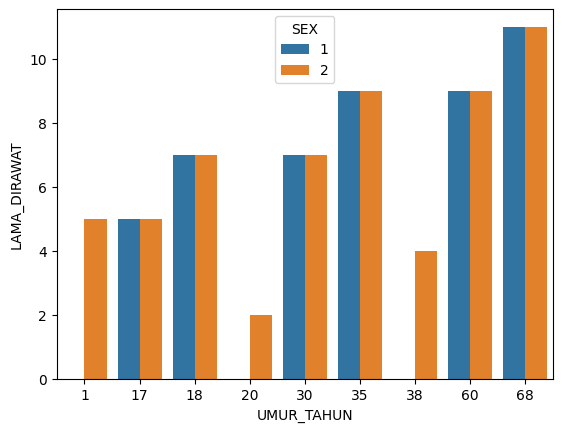

In [20]:
# sns.set(color_codes=True)
# sns.lmplot(x='UMUR_TAHUN', y='LAMA_DIRAWAT', hue='SEX', data = df)
data0 = df[df["Severity"] == 2]
sns.barplot(data=data0, x="UMUR_TAHUN", y="LAMA_DIRAWAT", hue="SEX")


<Axes: xlabel='UMUR_TAHUN', ylabel='LAMA_DIRAWAT'>

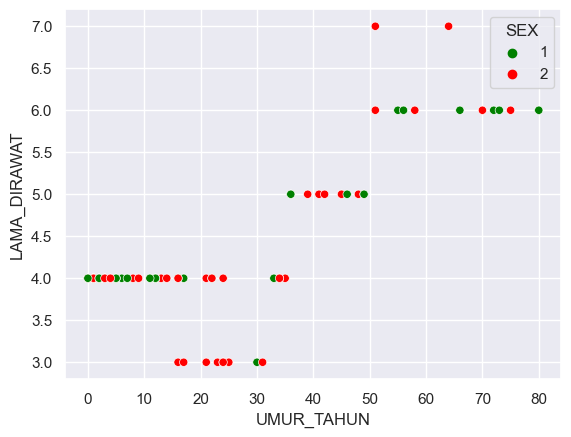

In [37]:
data1 = df[(df["Severity"] == 1)]
sns.color_palette("bright")
sns.scatterplot(data=data1, x="UMUR_TAHUN", y="LAMA_DIRAWAT", hue="SEX", palette=['green','red'])